In [1]:
#imports
import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn-whitegrid')

%matplotlib inline  

# ========================================================
# estilos de graficos :
# >>  https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# ========================================================
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('classic')
# plt.style.use('bmh')

In [2]:
def obterDataframe():
    return 1

In [29]:

probs = ['0.01','0.02','0.05']
sizes = ['100','1000','10000']

df_bubble = pd.DataFrame()
df_merge = pd.DataFrame()
df_quick = pd.DataFrame()
df_insertion = pd.DataFrame()
df_tudo = pd.DataFrame()

arq_metadata = open('../data/data_grouped/_metadata.csv', 'w+')

for prob in probs:
    for size in sizes:
        filtro_arq = '%s_%s_' % (prob, size) 

        pasta_origem = '../data/data_grouped'
        arqs_in = os.listdir(pasta_origem)
        for f in arqs_in:
            if (f.startswith(filtro_arq)):
                print(f)
                csv = os.path.join(pasta_origem, f)
                df_temp = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)
                df_tudo = df_tudo.append(df_temp)
                if ('bubble' in f):
                    df_bubble = df_bubble.append(df_temp)
                elif ('merge' in f):
                    df_merge = df_merge.append(df_temp)
                elif ('quick' in f):
                    df_quick = df_quick.append(df_temp)
                elif ('insertion' in f):
                    df_insertion = df_insertion.append(df_temp)


0.01_100_bubble.csv
0.01_100_merge.csv
0.01_100_quick.csv
0.01_100_insertion.csv
0.01_1000_insertion.csv
0.01_1000_bubble.csv
0.01_1000_merge.csv
0.01_1000_quick.csv
0.01_10000_insertion.csv
0.01_10000_quick.csv
0.01_10000_merge.csv
0.01_10000_bubble.csv
0.02_100_bubble.csv
0.02_100_merge.csv
0.02_100_quick.csv
0.02_100_insertion.csv
0.02_1000_bubble.csv
0.02_1000_quick.csv
0.02_1000_merge.csv
0.02_1000_insertion.csv
0.02_10000_bubble.csv
0.02_10000_insertion.csv
0.02_10000_merge.csv
0.02_10000_quick.csv
0.05_100_bubble.csv
0.05_100_merge.csv
0.05_100_quick.csv
0.05_100_insertion.csv
0.05_1000_bubble.csv
0.05_1000_insertion.csv
0.05_1000_quick.csv
0.05_1000_merge.csv
0.05_10000_insertion.csv
0.05_10000_bubble.csv
0.05_10000_quick.csv
0.05_10000_merge.csv


In [30]:
# df_bubble.head()
# df_merge.head()
# df_quick.head()
# df_insertion.head()

print( df_bubble.shape[0], df_merge.shape[0], df_quick.shape[0], df_insertion.shape[0] , df_tudo.shape[0])

9000 9000 9000 9000 36000


In [20]:
df_bubble.head()
df_bubble.probabilidade_erro.unique()

array([ 0.01,  0.02,  0.05])

In [61]:
data = df_tudo #[df_bubble['probabilidade_erro'] == 0.01]
data = df_tudo[df_tudo.size_of_array == 10000]
data = data[data.probabilidade_erro == 0.02]
data = data[data.algoritmo == 'merge']
data.head()
data = data[['largest_sorted_subarray','k_unordered_sequence', 'percentual_k_unordered','percentual_maior_array']]
# data_numeros = data_todos[['algoritmo','largest_sorted_subarray','k_unordered_sequence']]
# data_percentual = data_todos[['algoritmo','percentual_k_unordered','percentual_maior_array']]
# data_unordered = data_todos[['algoritmo','percentual_k_unordered']]
# data_maior_array = data_todos[['algoritmo','percentual_maior_array']]

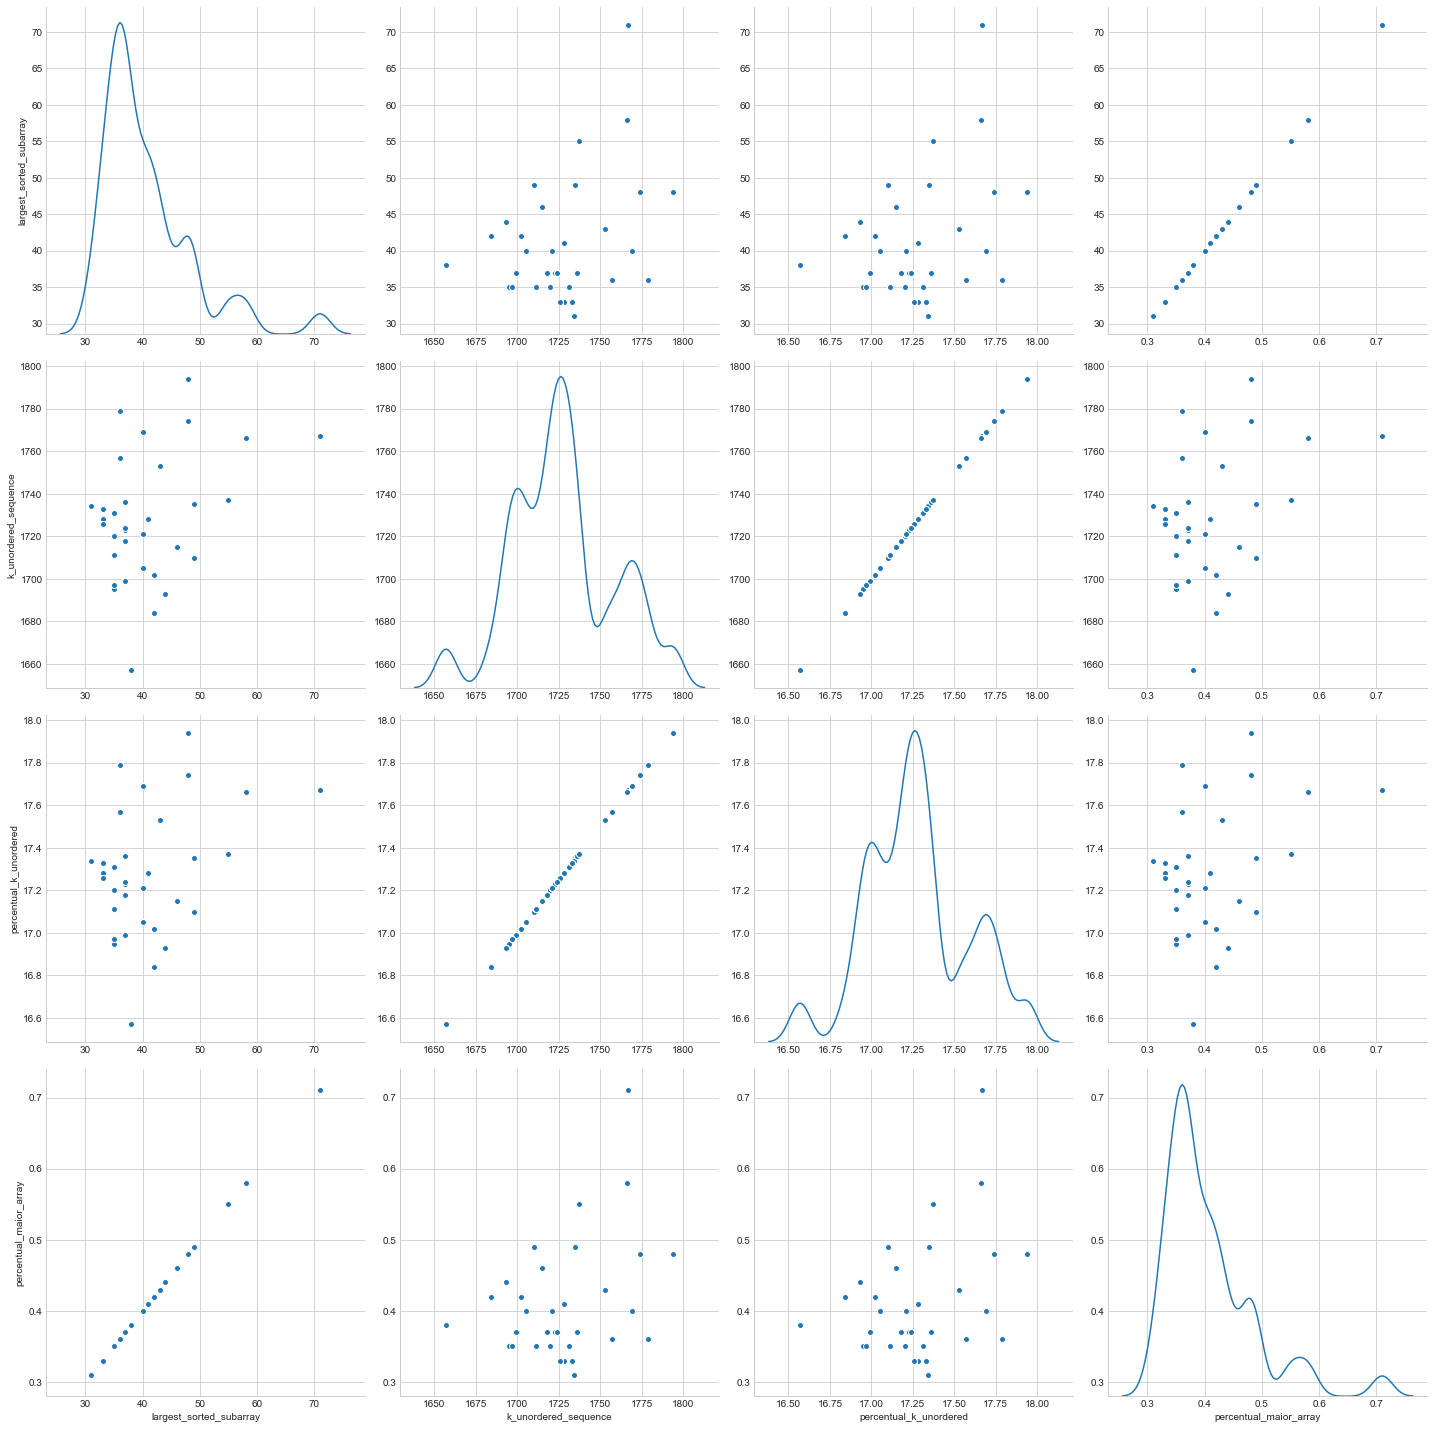

In [62]:
sns.pairplot(data=data, diag_kind='kde', size=5)

Text(0.5,1,'k-Unordered (Prob: 0.05, Tam: 10000)')

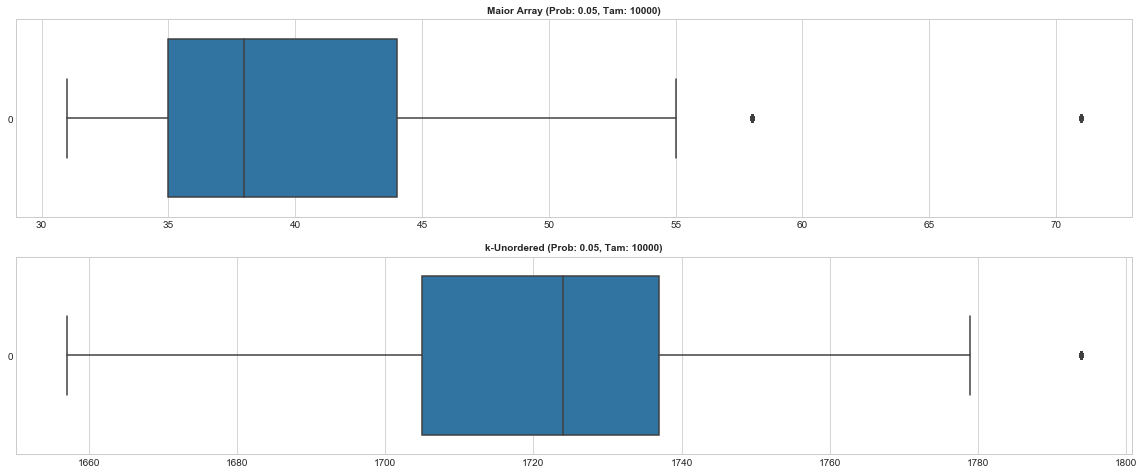

In [63]:
plt.figure(figsize=[20, 8])
font_prop = font_manager.FontProperties(size=10, style='normal', weight='bold')
nbins = 50
ax = plt.subplot(2,1,1)
sns.boxplot(data=data.largest_sorted_subarray, orient='h' )
plt.title('%s (Prob: %s, Tam: %s)' % ('Maior Array', prob, size), fontproperties=font_prop )

ax = plt.subplot(2,1,2)
sns.boxplot(data=data.k_unordered_sequence, orient='h' )
plt.title('%s (Prob: %s, Tam: %s)' % ('k-Unordered', prob, size), fontproperties=font_prop )


Text(0.5,1,'k-Unordered (Prob: 0.05, Tam: 10000)')

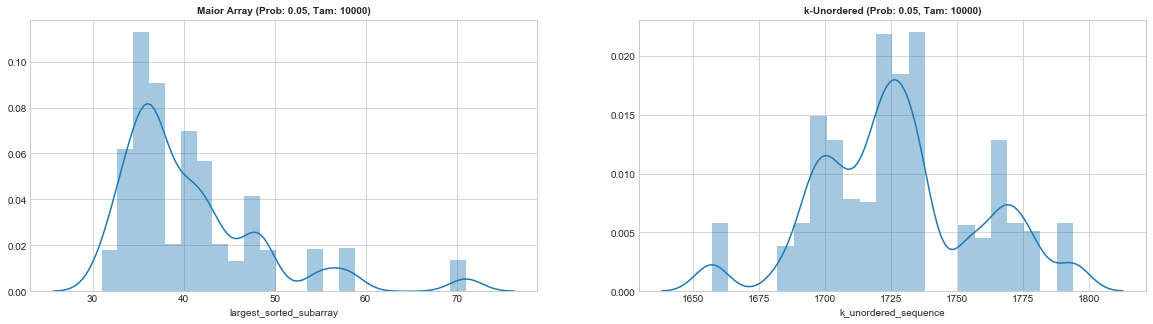

In [64]:
plt.figure(figsize=[20, 5])
font_prop = font_manager.FontProperties(size=10, style='normal', weight='bold')
nbins = 50
ax = plt.subplot(1,2,1)
sns.distplot(data.largest_sorted_subarray)
plt.title('%s (Prob: %s, Tam: %s)' % ('Maior Array', prob, size), fontproperties=font_prop )

ax = plt.subplot(1,2,2)
sns.distplot(data.k_unordered_sequence)
plt.title('%s (Prob: %s, Tam: %s)' % ('k-Unordered', prob, size), fontproperties=font_prop )


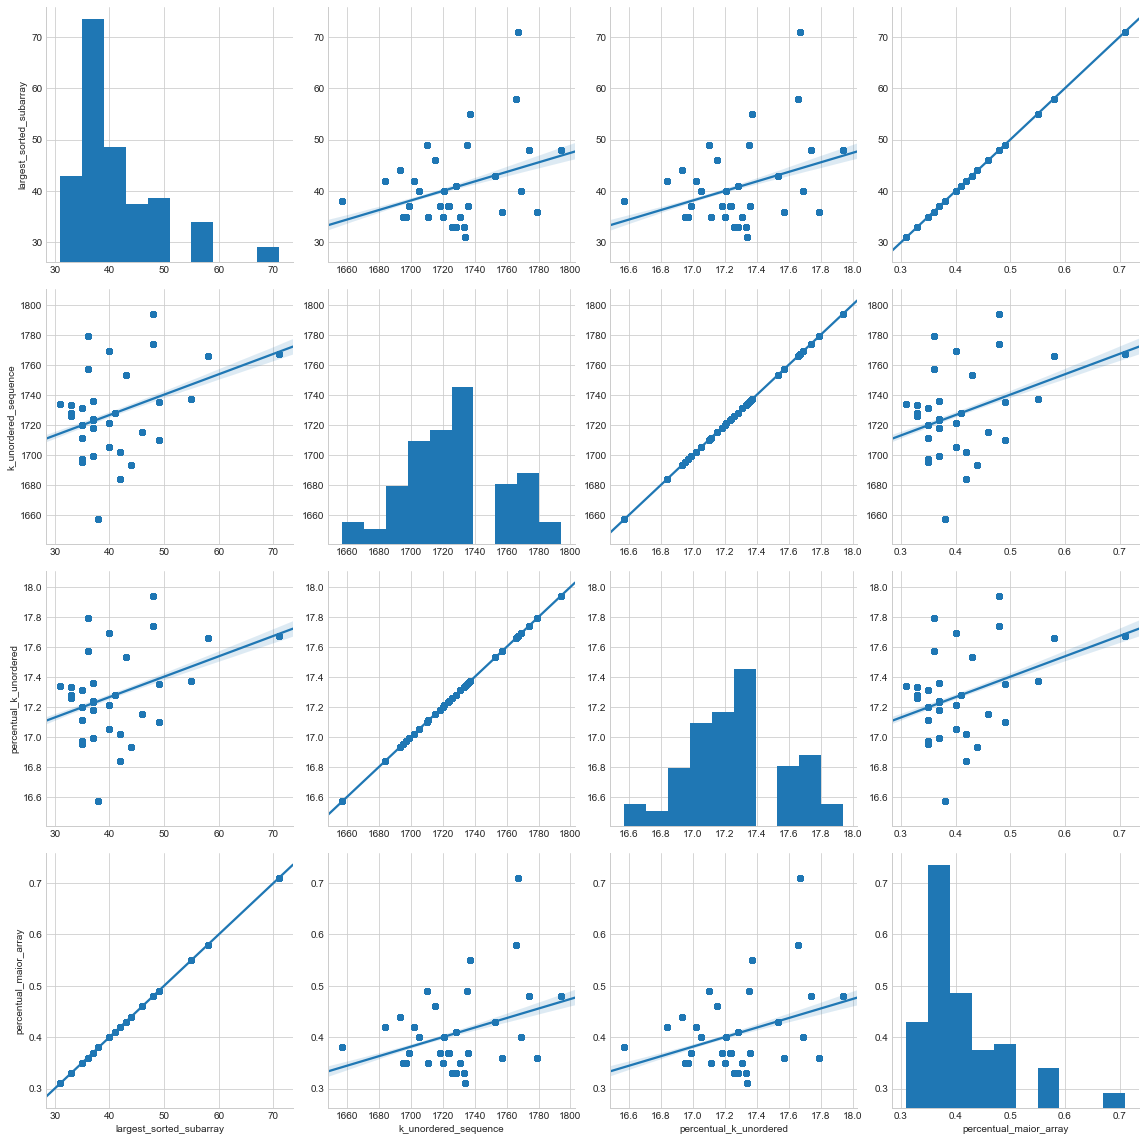

In [65]:

sns.pairplot(data=data,size=4, kind='reg')